In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [18]:
df=pd.read_csv('df_PCA.csv',delimiter=',')
df.head()

,customer_id,PC0,PC1,PC2,PC3,PC4,PC5,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_no_promotion_used,payment_method_CASH,payment_method_DIGI
0,1b8f824d5e,0.136546,0.000247,0.588527,0.788868,0.054088,0.421970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5d272b9dcb,0.136468,0.000000,0.591727,0.801303,0.036836,0.204790,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,f6d1b2ba63,0.214522,0.021476,0.295363,0.871453,0.354529,0.215721,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,180c632ed8,0.141770,0.006605,0.594165,0.797071,0.174897,0.281806,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4eb37a6705,0.142061,0.006840,0.594022,0.787458,0.085230,0.445947,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [19]:
df.set_index('customer_id',inplace=True)

In [20]:
metric_features=df.columns

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30554 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PC0                           30554 non-null  float64
 1   PC1                           30554 non-null  float64
 2   PC2                           30554 non-null  float64
 3   PC3                           30554 non-null  float64
 4   PC4                           30554 non-null  float64
 5   PC5                           30554 non-null  float64
 6   customer_region_2440          30554 non-null  float64
 7   customer_region_2490          30554 non-null  float64
 8   customer_region_4140          30554 non-null  float64
 9   customer_region_4660          30554 non-null  float64
 10  customer_region_8370          30554 non-null  float64
 11  customer_region_8550          30554 non-null  float64
 12  customer_region_8670          30554 non-null  float

In [47]:
cluster_range = range(5, 16)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []
davies_bouldin_scores = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df)

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df, cluster_labels)
    avg_silhouette.append(silhouette_avg)

    # Compute and store Davies-Bouldin Score
    db_score = davies_bouldin_score(df, cluster_labels)
    davies_bouldin_scores.append(db_score)


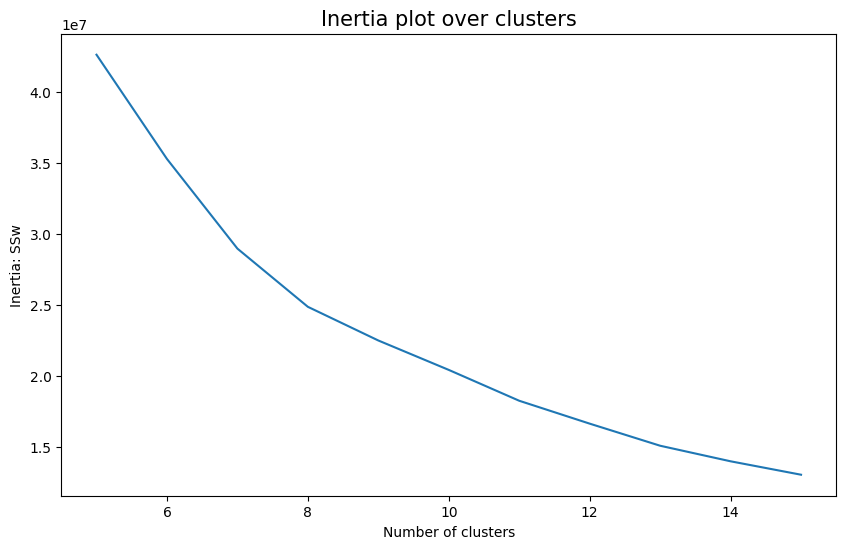

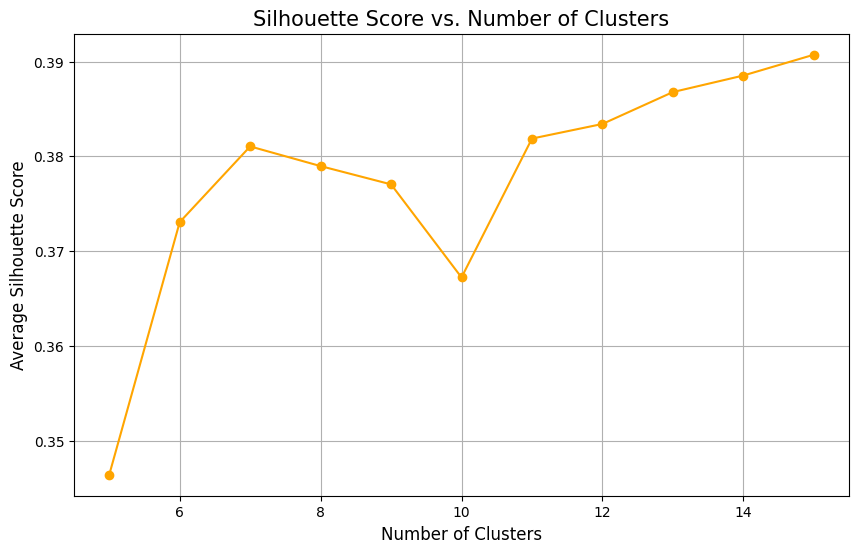

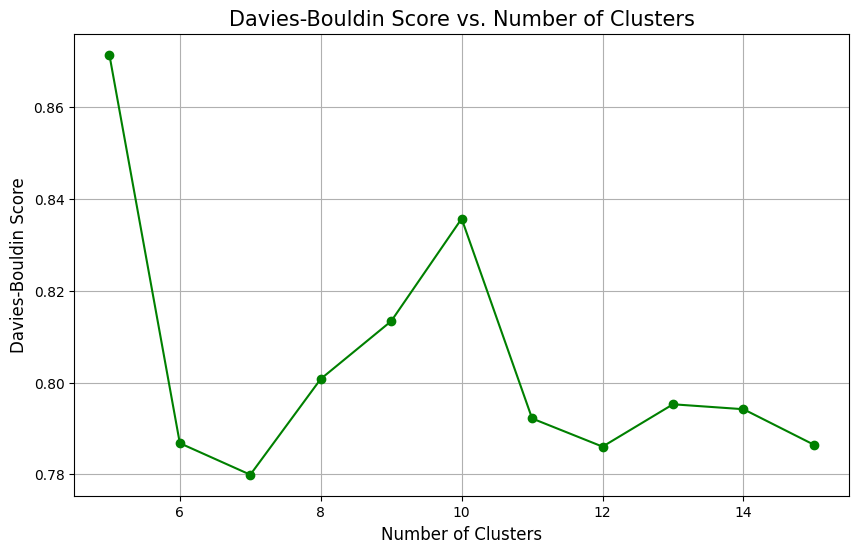

In [48]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, davies_bouldin_scores, marker='o', color='green')
plt.title("Davies-Bouldin Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Davies-Bouldin Score", size=12)
plt.grid(True)
plt.show()

8 clusters appear to balance most metrics (silhouette score, inertia, and Davies-Bouldin index)

In [49]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans_labels = kmeans.fit_predict(df)


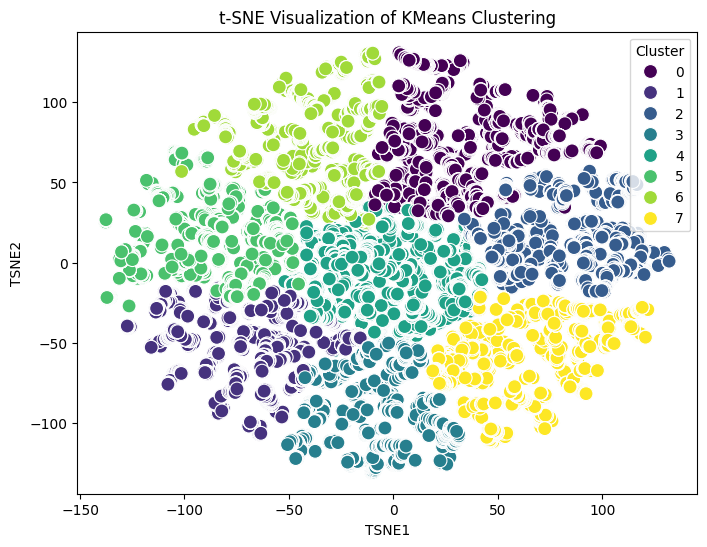

In [50]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df)

# Step 4: Create a DataFrame for visualization
df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df['Cluster'] = kmeans_labels  # Add KMeans cluster labels to DataFrame

# Step 5: Plot the t-SNE results, color-coded by KMeans cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', data=df, s=100, marker='o', legend='full')
plt.title("t-SNE Visualization of KMeans Clustering")
plt.show()

In [51]:
df_clean=pd.read_csv('df_Clean.csv',delimiter=',')

In [52]:
cuisines = [col for col in df_clean.columns if col.startswith("CUI_")]
df_clean['cluster'] = kmeans_labels
cluster_summary = df_clean.groupby('cluster')[cuisines].mean()


In [53]:
cluster_cuisine_spending = cluster_summary[cuisines]

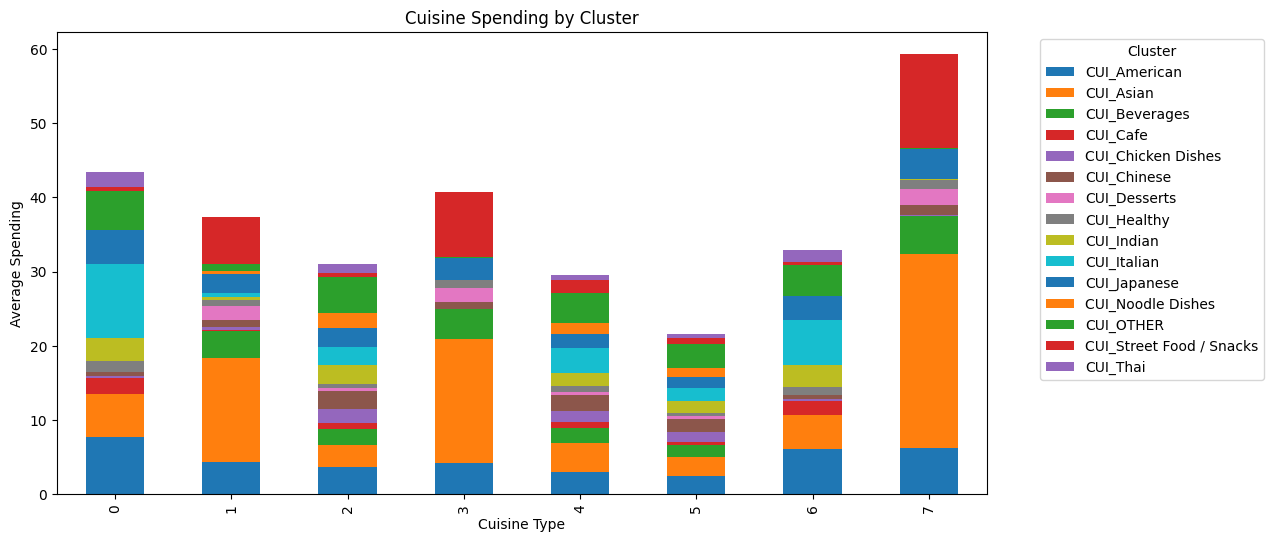

In [54]:
cluster_cuisine_spending.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Cuisine Spending by Cluster')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Spending')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [55]:
df_clean.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8',
       'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16',
       'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'Total_Spent', 'order_count', 'Diversity_Cuisine', 'costumer_time',
       'Intensity_of_Activity', 'Customer_loyalty', 'product_intensity',
       'Day_Week_Spread', 'cluster'],
      dtype='object')

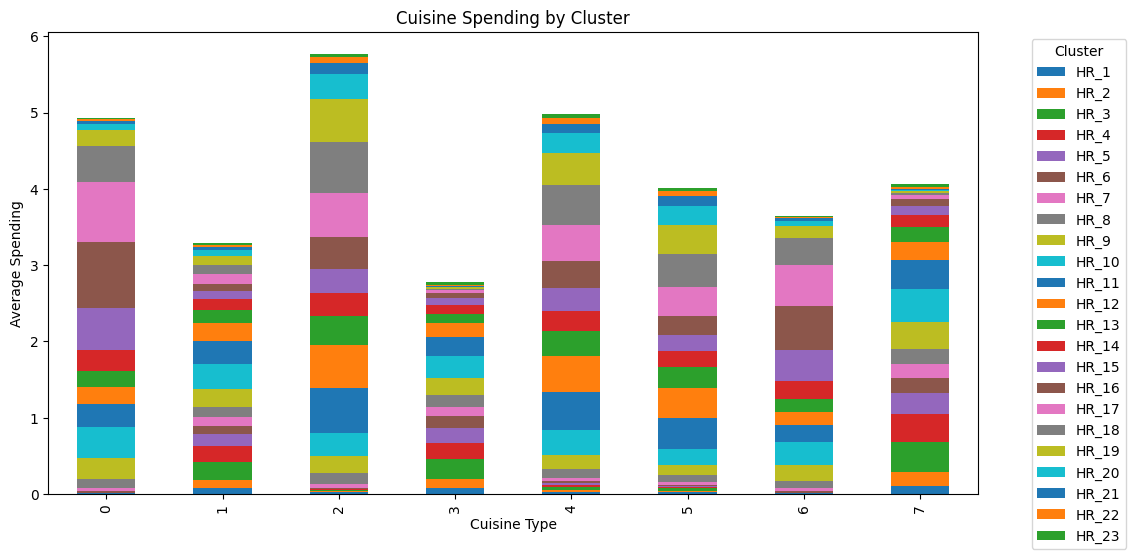

In [56]:
hours=[col for col in df_clean.columns if col.startswith("HR_")]
hours_summary = df_clean.groupby('cluster')[hours].mean()
cluster_hour_spending = hours_summary[hours]
cluster_hour_spending.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Cuisine Spending by Cluster')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Spending')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

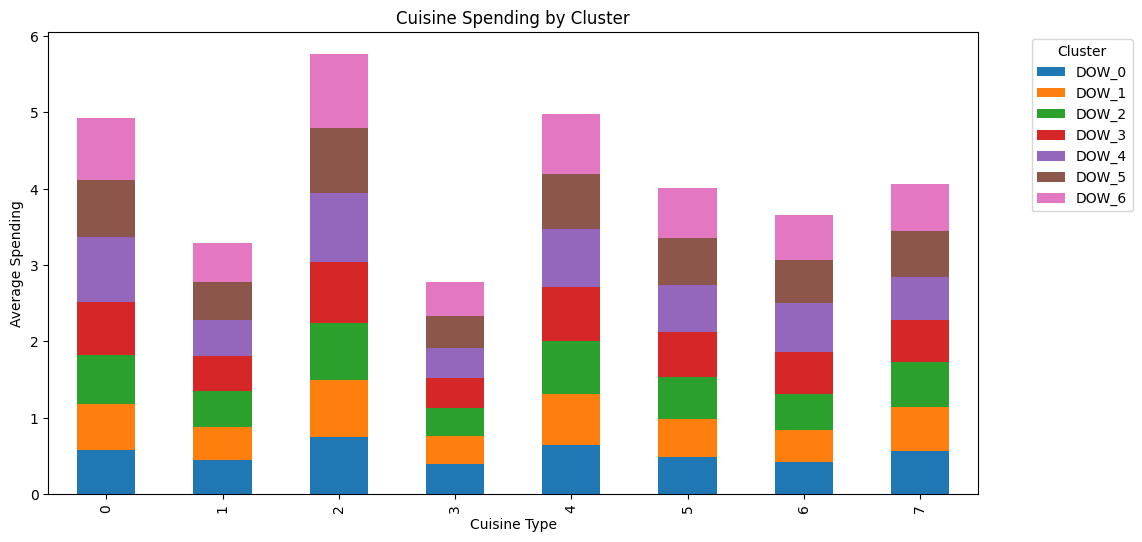

In [57]:
days_week=[col for col in df_clean.columns if col.startswith("DOW_")]
week_summary = df_clean.groupby('cluster')[days_week].mean()
cluster_week_spending = week_summary[days_week]
cluster_week_spending.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Cuisine Spending by Cluster')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Spending')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()